In [2]:
import pschitt.geometry as geo
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
import time
import math
import pschitt.sky_objects as sky
import pschitt.camera_image as ci
import pschitt.hillas as hillas
import os
import pschitt.vizualisation as viz
from importlib import reload

In [3]:
%matplotlib inline

In [4]:
shower = sky.shower()

shower.impact_point = np.array([80,60,0])

#shower direction
shower.alt = math.radians(80)
shower.az = math.radians(90)

#pointing direction
talt = math.radians(81)
taz = math.radians(89)

#shower parameters
shower_top = 12000
shower_length = 8000
shower_width = 100

shower.number_of_particles = int(1e4)

In [5]:
# shower.gaussian_ellipsoide_alongz([100,0,6000], 6000, 400)
shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)
# shower.random_ellipsoide(shower_top, shower_length, shower_width)

In [6]:
X, Y = np.mgrid[-1:1:50j, -1:1:50j]
positions = np.vstack([X.ravel(), Y.ravel()])

In [7]:
t = positions.T

In [8]:
len(t[:,0])

2500

(-1.1070967741935485,
 1.107096774193548,
 -1.1109271523178808,
 1.1109271523178808)

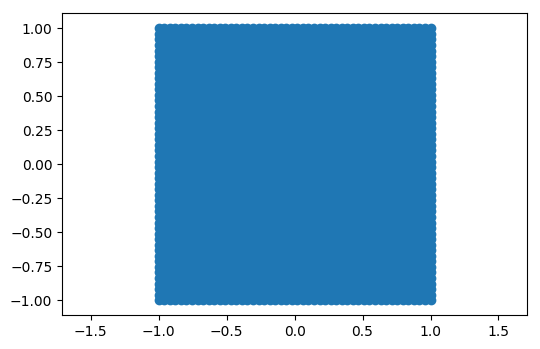

In [9]:
plt.scatter(t[:,0], t[:,1])
plt.axis('equal')

In [10]:
tel_normal = geo.altaz_to_normal(talt,taz)
tel1 = geo.Telescope([200,200,0],tel_normal,0)
tel2 = geo.Telescope([-200,200,0],tel_normal,0)
tel3 = geo.Telescope([-200,-200,0],tel_normal,0)
tel4 = geo.Telescope([200,-200,0],tel_normal,0)
tel5 = geo.Telescope([0,0,0],tel_normal,0)

alltel = [tel1, tel2, tel3, tel4, tel5]

In [11]:
tel1.focale

16

In [12]:
for tel in alltel:
    tel.pixel_tab = t

In [13]:
reload(viz)

<module 'pschitt.vizualisation' from '/Users/thomasvuillaume/Work/Dev/pschitt/pschitt/vizualisation.py'>

/Users/thomasvuillaume/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


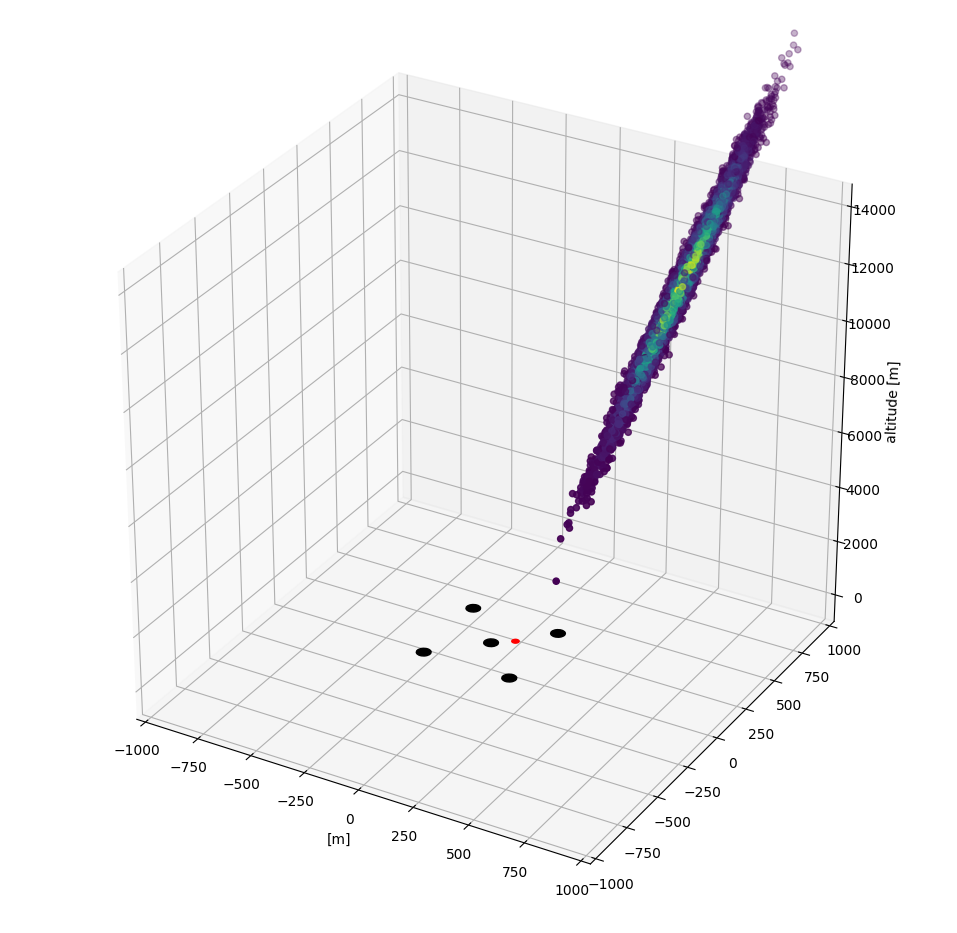

In [15]:
plt.figure(figsize=(9,6))
viz.plot_shower3d(shower, alltel, density_color=True)
# plt.savefig('../Images/ICRC2017/shower3D.eps', fmt='eps', dpi=300)

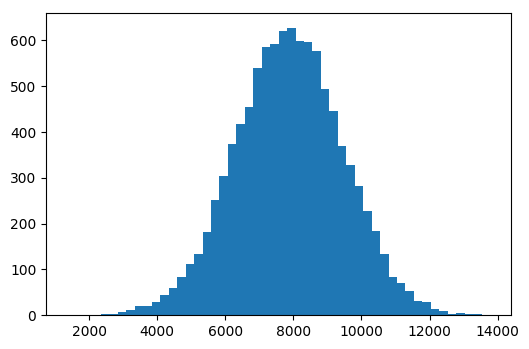

In [16]:
#plt.scatter(shower.array[:,0], shower.array[:,2])
plt.hist(shower.array[:,2], bins=50);
#plt.axis('equal')

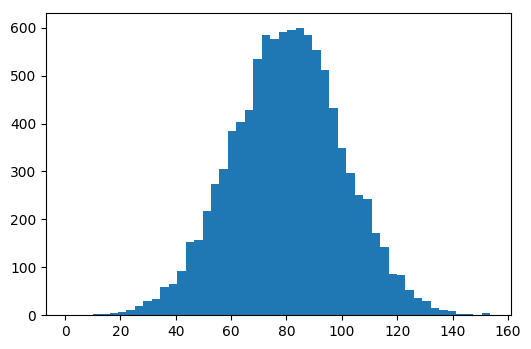

In [17]:
plt.hist(shower.array[:,0], bins=50);

(-250, 250)

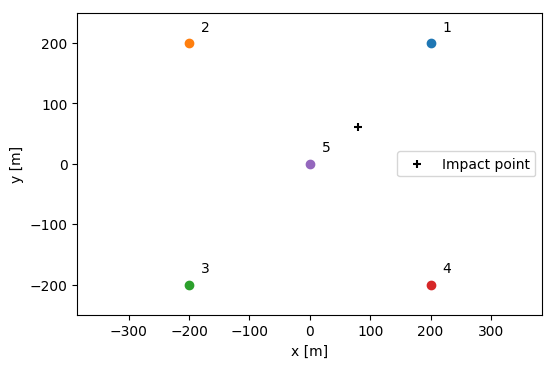

In [18]:
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot

plt.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point', marker="+")

#cherenkov_circle = plt.Circle((shower.impact_point[0], shower.impact_point[1]), 120, color='r', fill = False)
#ax.add_artist(cherenkov_circle)

viz.plot_array(alltel)
plt.axis('equal')
plt.ylim(-250,250)

In [19]:
trigger_intensity = 20.
noise = 6000

In [20]:
ci.array_shower_imaging(shower, alltel, noise)

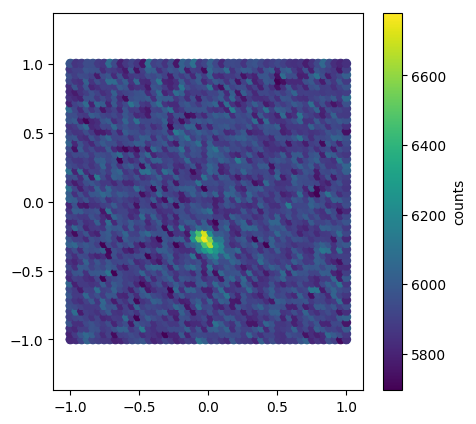

In [22]:
tel0 = alltel[0]
plt.figure(figsize=(5,5))
viz.display_camera_image(tel0)
plt.scatter(tel0.pixel_tab[:,0], tel0.pixel_tab[:,1], c = tel0.signal_hist, marker='H')
plt.clim(5800,6800)
# plt.savefig('../Images/ICRC2017/tel0.eps', fmt='eps', dpi=300)

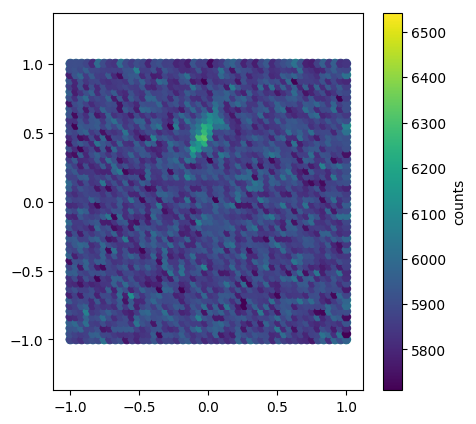

In [23]:
tel0 = alltel[1]
plt.figure(figsize=(5,5))
viz.display_camera_image(tel0)
plt.scatter(tel0.pixel_tab[:,0], tel0.pixel_tab[:,1], c=tel0.signal_hist, marker='H')
plt.clim(5800,6800)
# plt.savefig('../Images/ICRC2017/tel1.eps', fmt='eps', dpi=300)

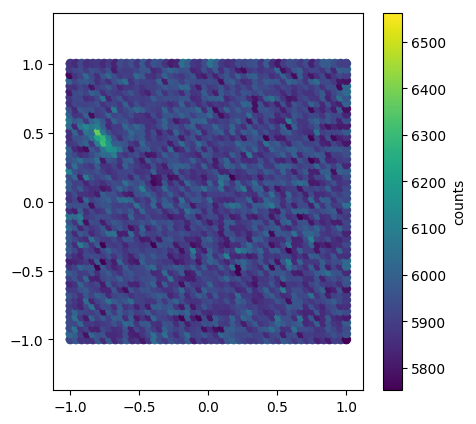

In [24]:
tel0 = alltel[2]
plt.figure(figsize=(5,5))
viz.display_camera_image(tel0)
plt.scatter(tel0.pixel_tab[:,0], tel0.pixel_tab[:,1], c=tel0.signal_hist, marker='H')
plt.clim(5800,6800)
# plt.savefig('../Images/ICRC2017/tel3.eps', fmt='eps', dpi=300)

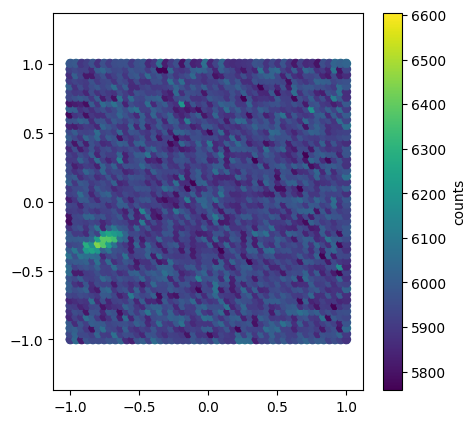

In [25]:
tel0 = alltel[3]
plt.figure(figsize=(5,5))
viz.display_camera_image(tel0)
plt.scatter(tel0.pixel_tab[:,0], tel0.pixel_tab[:,1], c=tel0.signal_hist, marker='H')
plt.clim(5800,6800)
# plt.savefig('../Images/ICRC2017/tel4.eps', fmt='eps', dpi=300)

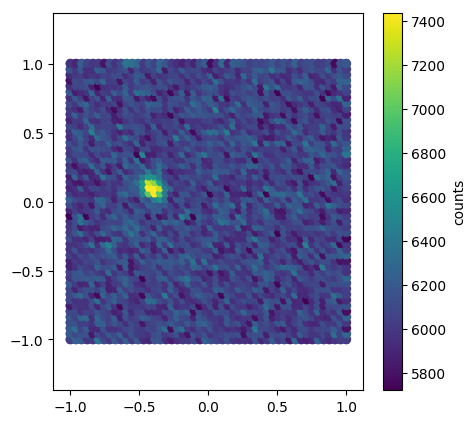

In [26]:
tel0 = alltel[4]
plt.figure(figsize=(5,5))
viz.display_camera_image(tel0)
plt.scatter(tel0.pixel_tab[:,0], tel0.pixel_tab[:,1], c=tel0.signal_hist, marker='H')
plt.clim(5800,6800)
# plt.savefig('../Images/ICRC2017/tel5.eps', fmt='eps', dpi=300)

Number of triggered telescopes =  5


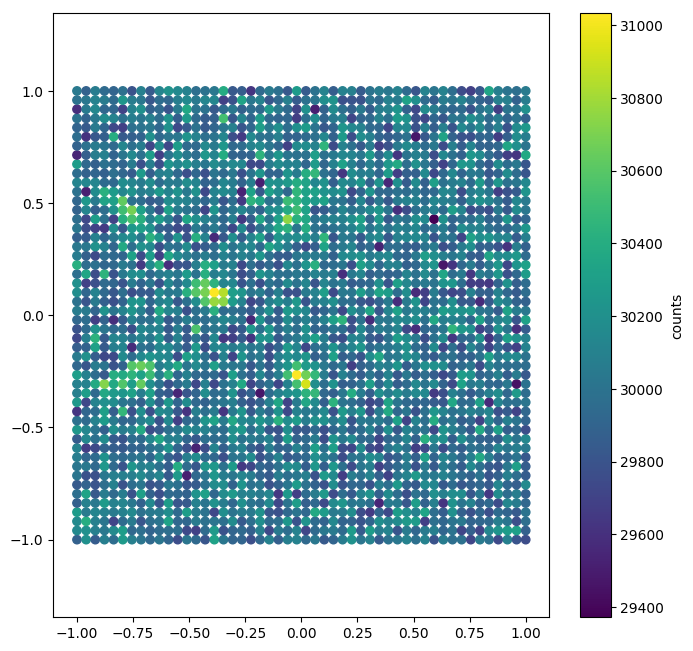

In [27]:
plt.figure(figsize=(8,8))
HP, triggered_telescopes = hillas.array_hillas_parameters(alltel, trigger_intensity)
print("Number of triggered telescopes = ", len(triggered_telescopes))

viz.display_stacked_cameras(triggered_telescopes)

if len(triggered_telescopes)>1:
    pa = hillas.impact_parameter_average(triggered_telescopes, HP)
    p = hillas.impact_parameter_ponderated(triggered_telescopes, HP)

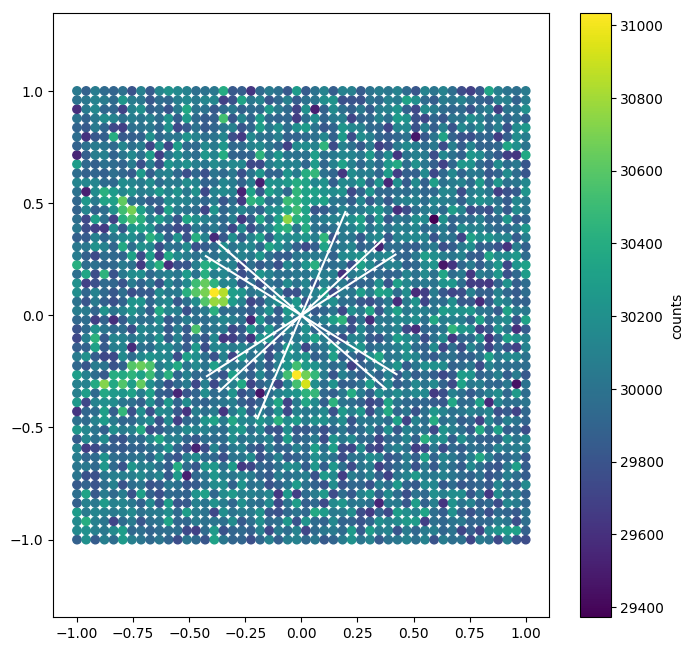

In [29]:
plt.figure(figsize=(8,8))
viz.display_stacked_cameras(alltel)
x = np.linspace(-0.5, 0.5)
for tel, hp in zip(triggered_telescopes, HP):
    plt.plot(hp[1] + x*np.cos(hp[7] + math.pi/2.), hp[2] + x*np.sin(hp[7] + math.pi/2.), color="white")
    plt.axis('equal')
# plt.savefig('../Images/ICRC2017/hillas.eps', fmt='eps', dpi=300)

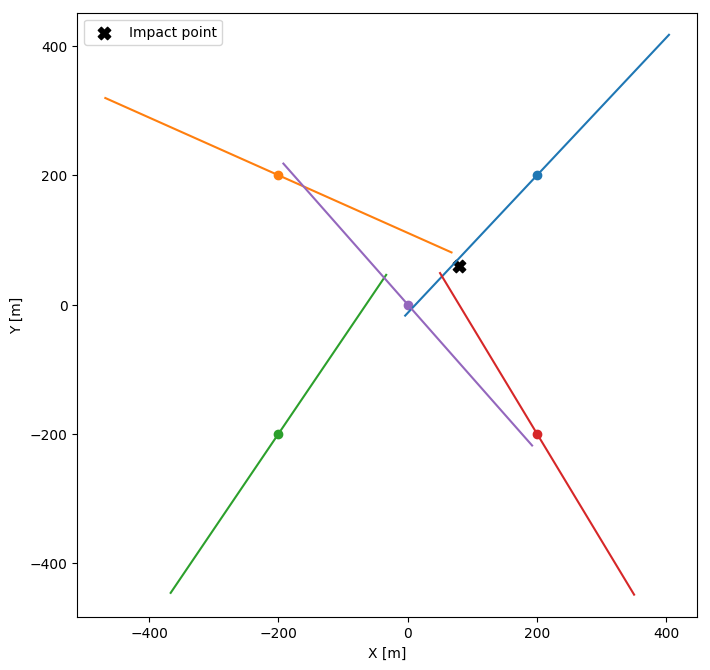

In [33]:
x = np.linspace(-300,300)
HP = np.array(HP)
# for (hp,tel) in zip(HP, triggered_telescopes):
hp = HP[0]
plt.figure(figsize=(8,8))

plt.axis('equal')
for tel in triggered_telescopes:
    plt.scatter(tel.mirror_center[0], tel.mirror_center[1])
    
for (tel, hp) in zip(triggered_telescopes, HP):
    alt = talt
    az = taz
    psi = hp[7] + np.pi/2.
    n = [
    np.sin(alt)**2 * np.cos(az) * np.cos(psi) - np.sin(alt)*np.sin(az) * np.sin(psi) + np.cos(alt)**2 * np.sin(az)*np.cos(psi),
    np.sin(alt)**2 * np.sin(az) * np.cos(psi) + np.sin(alt)*np.cos(az) * np.sin(psi) - np.cos(alt)**2 * np.cos(az)*np.cos(psi)
    ]
    plt.plot(x*n[0] + tel.mirror_center[0], x*n[1] + tel.mirror_center[1]);

plt.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point', marker='X', s=80)
    
plt.axis('equal')
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.legend()
# plt.savefig("../Images/ICRC2017/hillasreco_site.eps", fmt='eps', dpi=300)

In [236]:
if len(triggered_telescopes)>1:
    pa = hillas.impact_parameter_average(triggered_telescopes, HP)
    p = hillas.impact_parameter_ponderated(triggered_telescopes, HP)

In [237]:
if len(triggered_telescopes)>1:
    print("Real impact parameter : ", shower.impact_point)
    print("Reconstruction with simple average = %s \tError = %.2fm" % (pa, math.sqrt(((shower.impact_point-pa)**2).sum())))
    print("Reconstruction with ponderation and cut = %s \tError = %.2fm" % (p, math.sqrt(((shower.impact_point-p)**2).sum())))

Real impact parameter :  [80 60  0]
Reconstruction with simple average = [73.40166936414991, 55.555663243271098, 0.0] 	Error = 7.96m
Reconstruction with ponderation and cut = [62.804052591795738, 45.651661166475698, 0.0] 	Error = 22.40m
